You are tasked with developing a machine learning model to predict customer churn for a telecommunications company. The company wants to identify which customers are likely to leave (churn) and target them with retention offers. Our goal is to create a machine learning models and evaluate different models that accurately predicts customer churn based on historical customer data.

Case Study: Customer Churn Prediction

In [1]:
!pip install xgboost

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier #Adaboost Algorithm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings("ignore")



In [5]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Data Science Project\Telco_Customer_Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
#Get the look into the column of the data and size of the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Get the information on the data columns, size, non-null value count, and the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Drop the 'customerID' column
data.drop("customerID", axis=1,inplace=True)

In [13]:
#Get the look into the column names after dropping column customerID
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#Get the column names
data.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
#Get the gender value counts
data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [19]:
#Get the unique values in gender column
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
##Get the unique values in SeniorCitizen column
data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [23]:
#Get the unique values of all the columns in data
for col in data.columns:
    if col not in ['tenure','MonthlyCharges','TotalCharges']:
        print(col, data[col].unique())
    

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [25]:
#Checking null values in the data
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
#checking for spaces or null values as TotalCharges type is object that i.e."a string"

for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col, len(data[data[col]==" "]))
    

tenure 0
MonthlyCharges 0
TotalCharges 11


In [29]:
#Replace the spaces in TotalCharges with float data type values 0.0

data['TotalCharges']=data['TotalCharges'].replace({" ":"0.0"}).astype(float)

In [31]:
#After replacing the spaces in Total charges with floats check the info to see TotalCharges changed to datatype float
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [33]:
#To check for Churn value counts

data['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

#The above target (Churn) data is found to be imbalanced as "No" counts are more and "Yes" is very less.
#Now our next step is to do exploratory data analysis. 

Exploratory Data Analysis

In [35]:
#Check the data size
data.shape

(7043, 20)

In [37]:
#Get the column names
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [39]:
#Transposes the output, swapping rows and columns for better readability

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [41]:
#Checking distribution and checking for outliers for tenure, MonthlyCharges, and TotalCharges

def plot_distribution (data,column_name):
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column_name],kde=True)
    plt.title(f"Distribution of {column_name}")

    col_mean = data[column_name].mean()
    col_median = data[column_name].median()
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="orange", linestyle="--", label="Median")

    plt.legend()
    plt.subplot(1, 2, 2)
    sns.boxplot(y = data[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

    

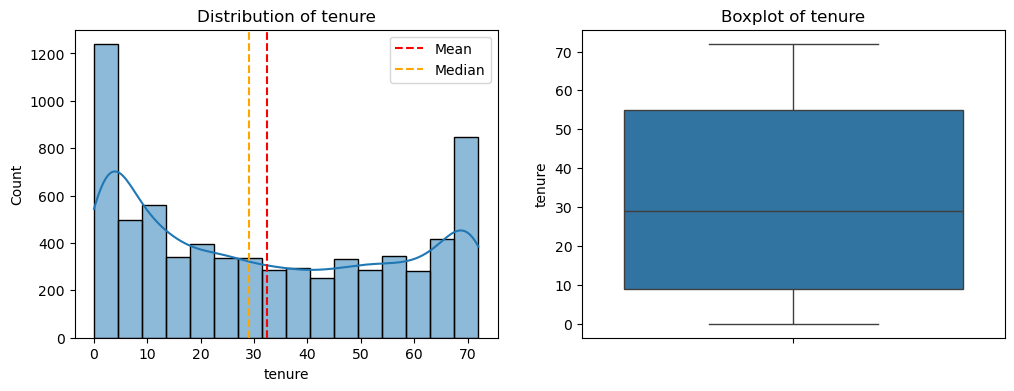

In [43]:
plot_distribution(data,"tenure")

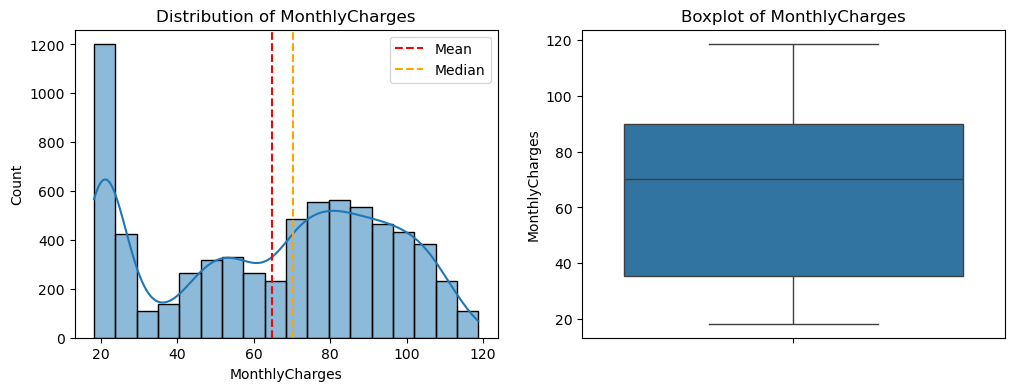

In [45]:
plot_distribution(data,"MonthlyCharges")

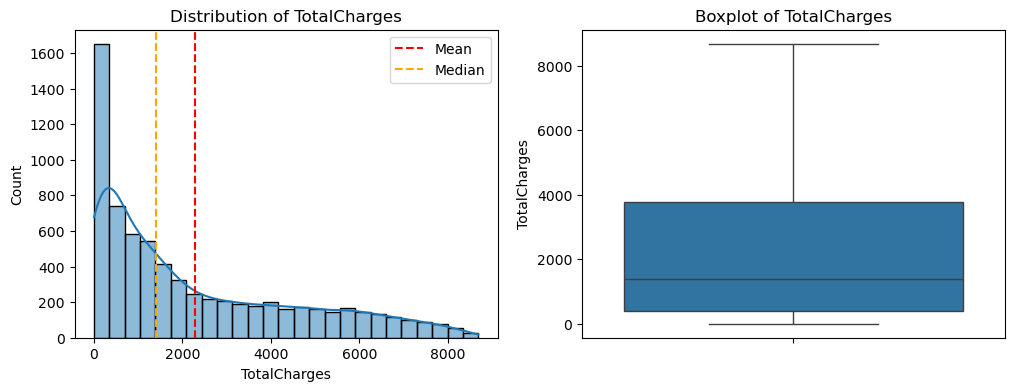

In [47]:
plot_distribution(data,"TotalCharges")

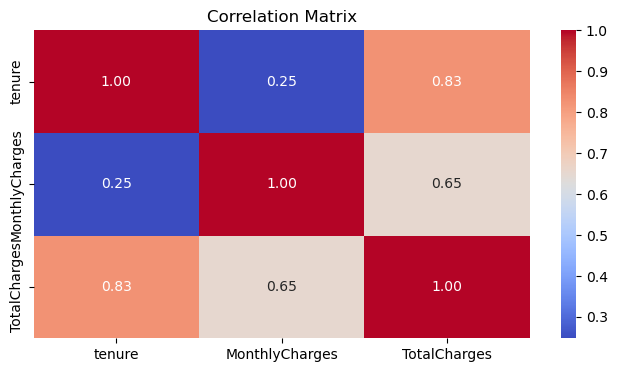

In [49]:
#To check for correlation between the columns tenure, MonthlyCharges, and TotalCharges

plt.figure(figsize = (8,4))
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr(), annot = True, cmap ="coolwarm", fmt =".2f")
plt.title("Correlation Matrix")
plt.show()

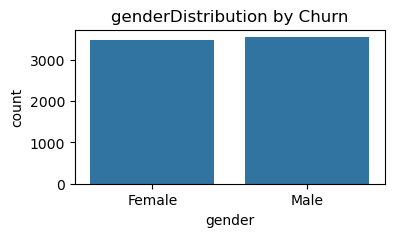

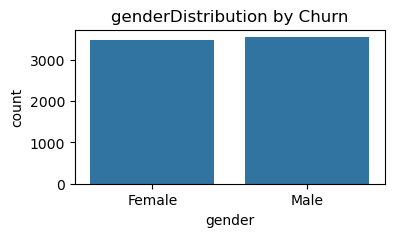

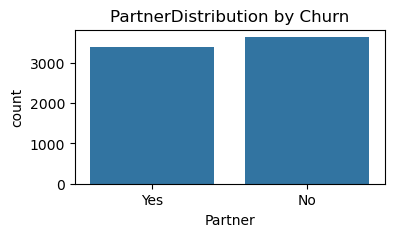

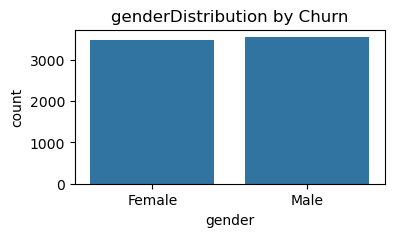

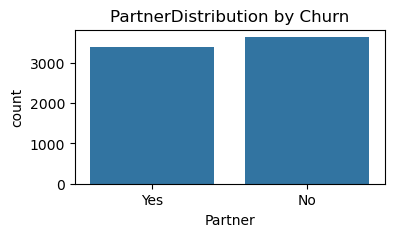

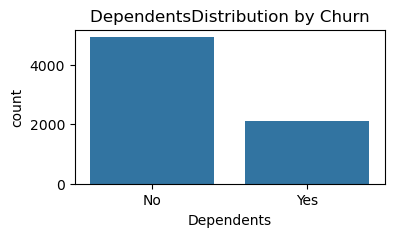

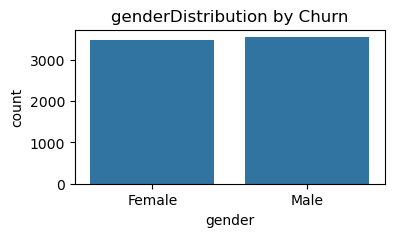

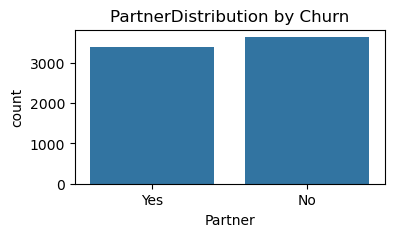

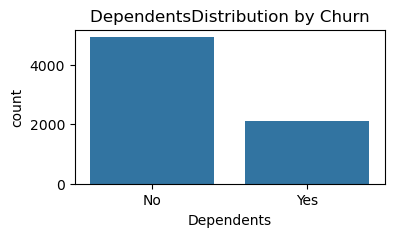

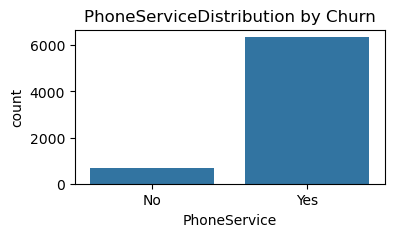

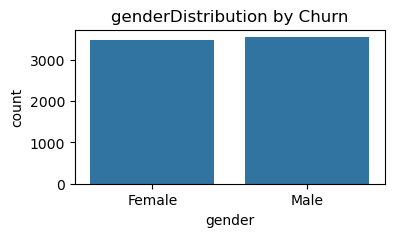

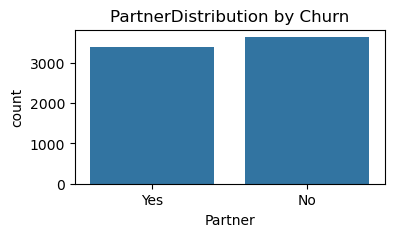

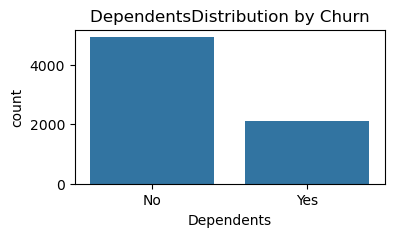

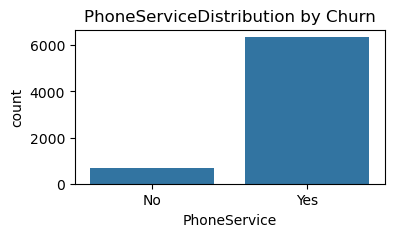

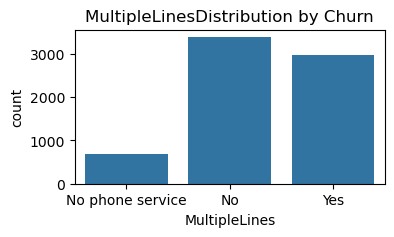

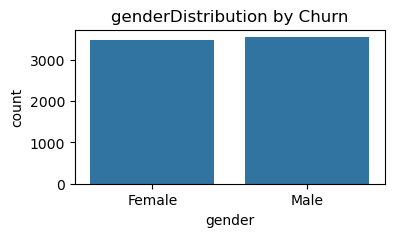

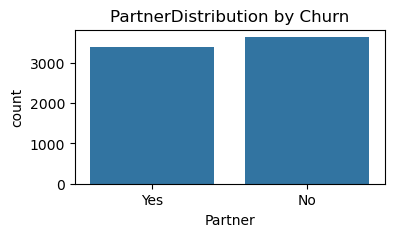

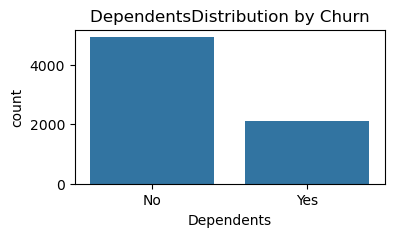

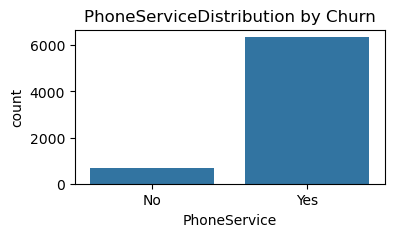

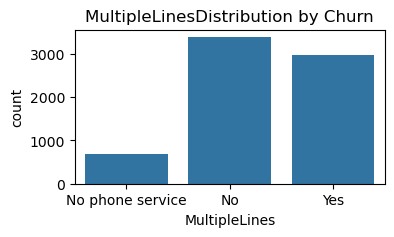

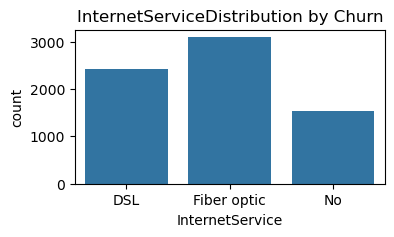

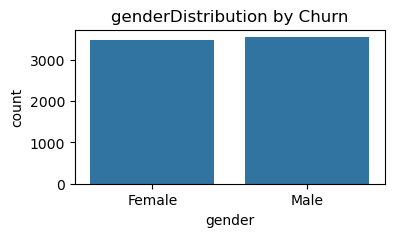

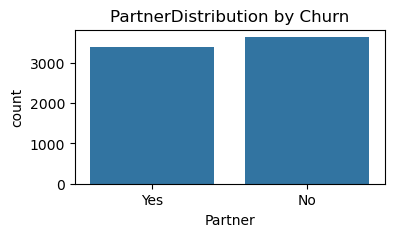

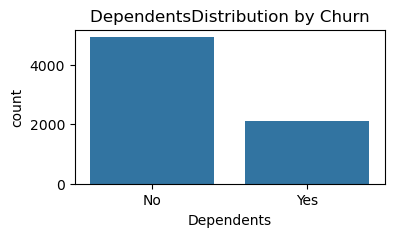

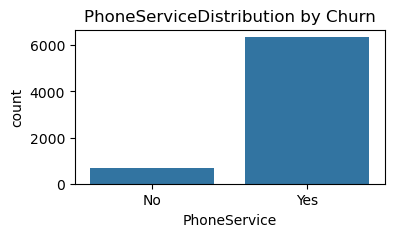

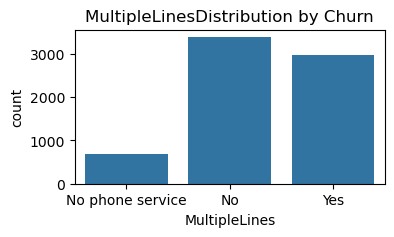

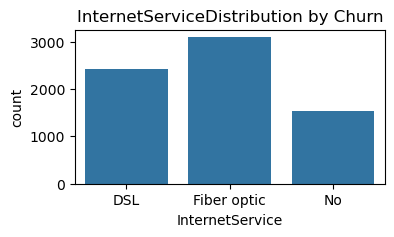

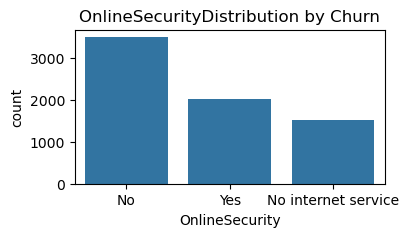

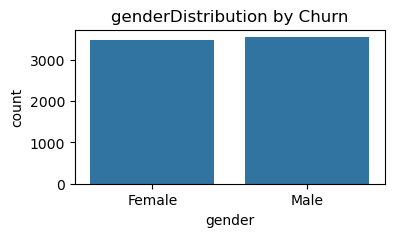

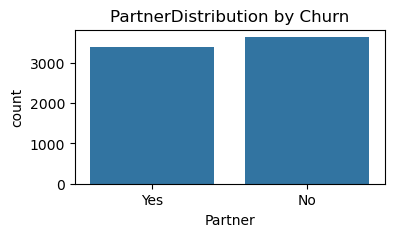

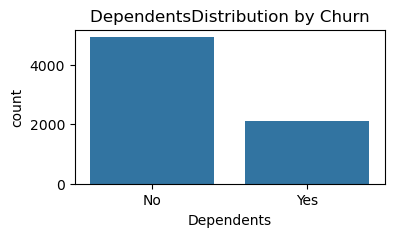

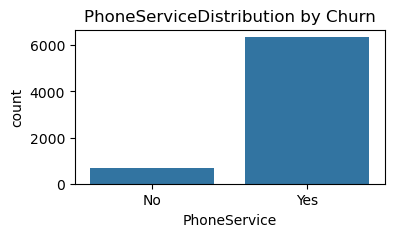

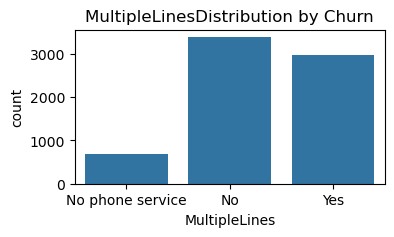

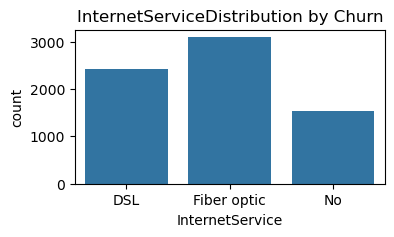

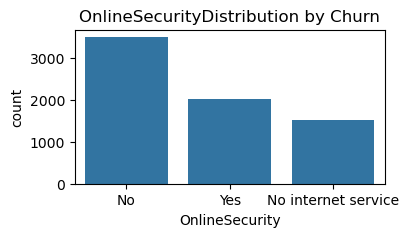

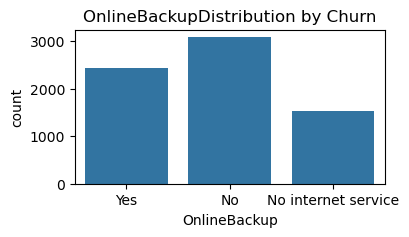

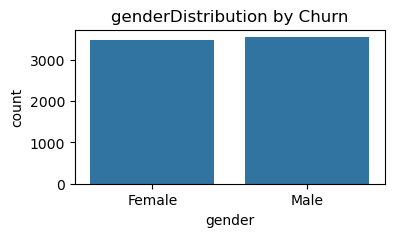

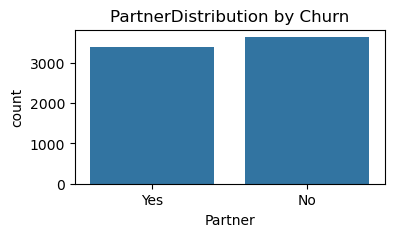

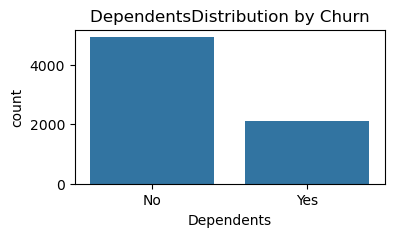

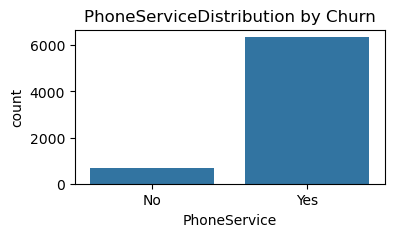

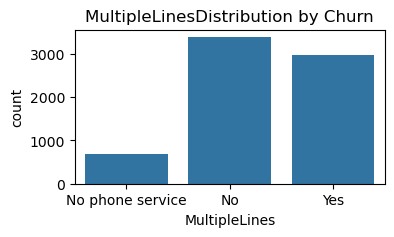

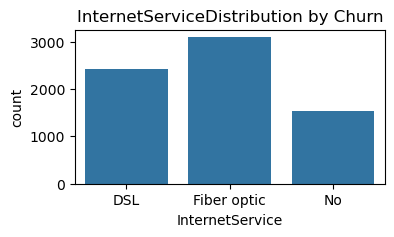

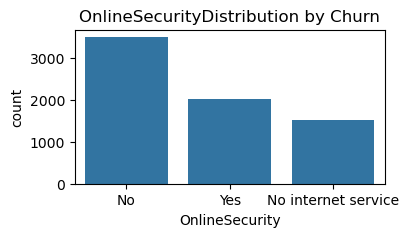

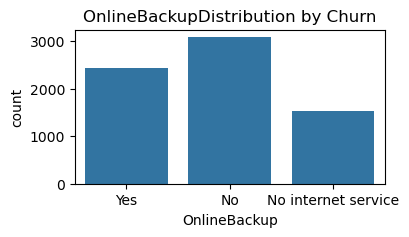

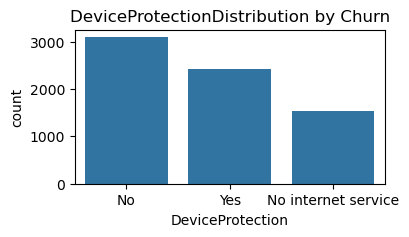

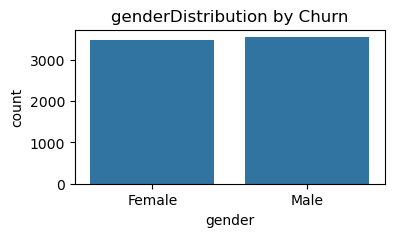

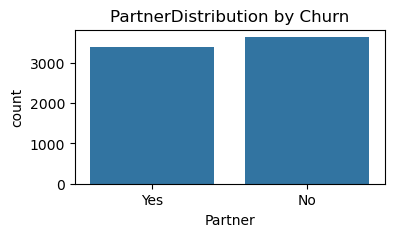

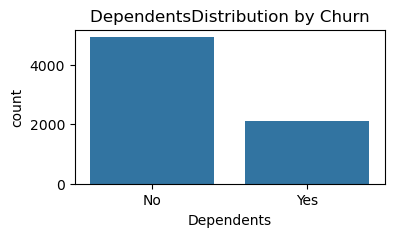

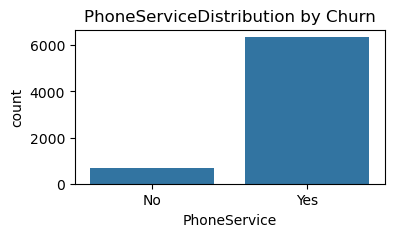

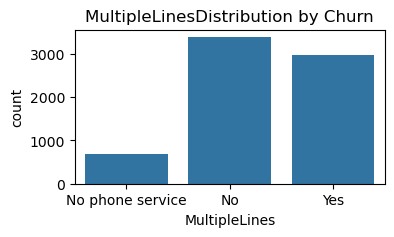

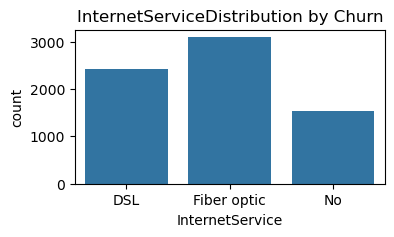

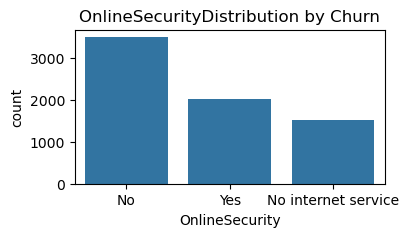

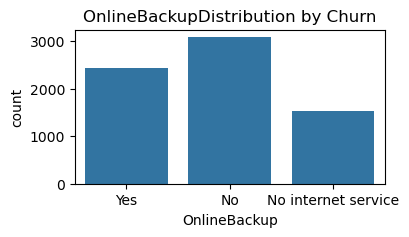

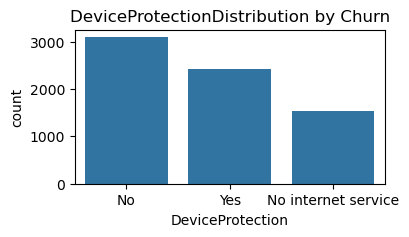

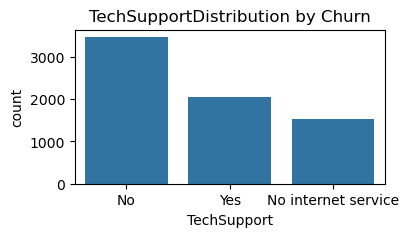

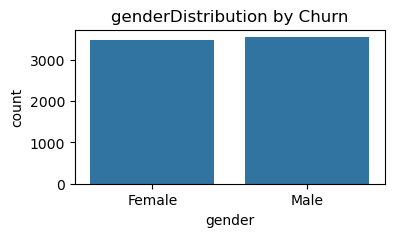

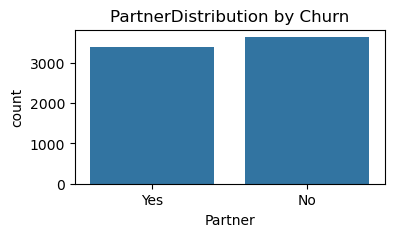

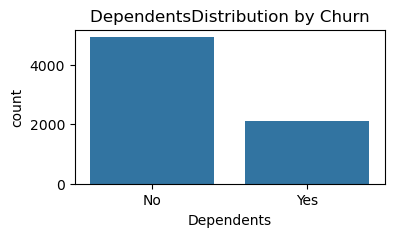

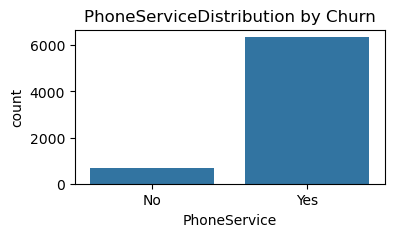

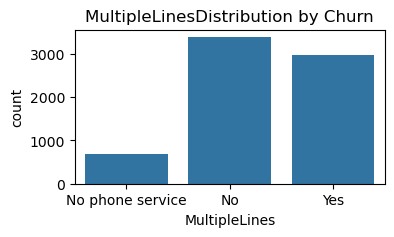

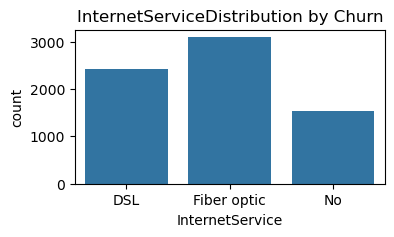

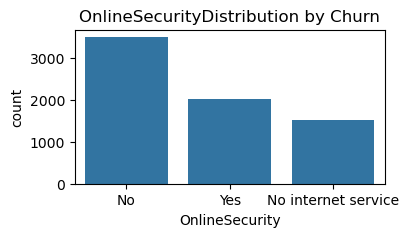

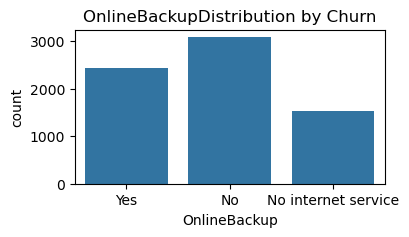

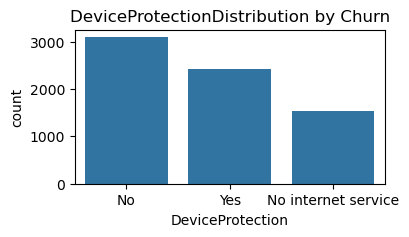

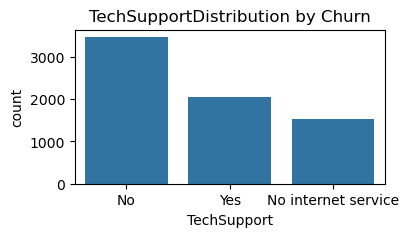

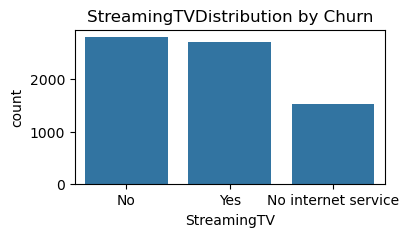

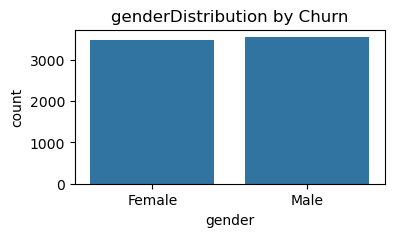

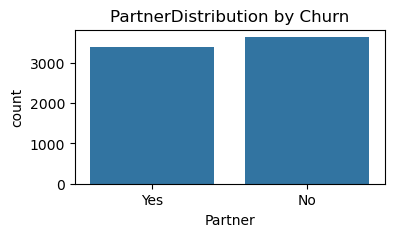

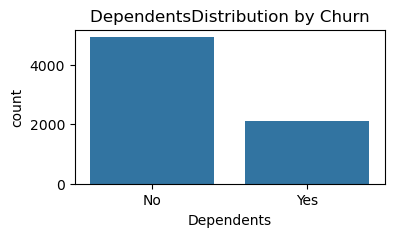

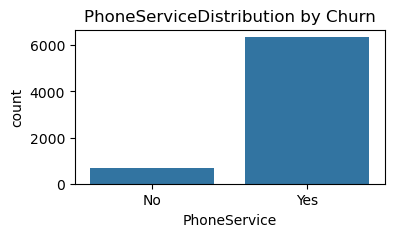

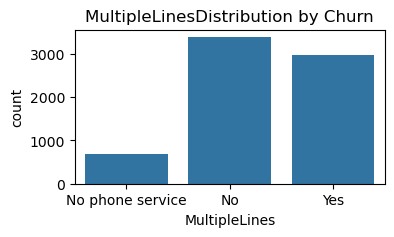

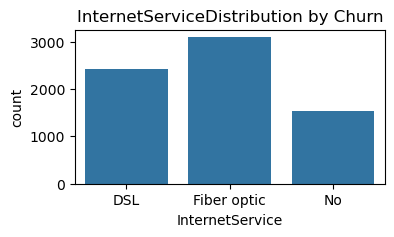

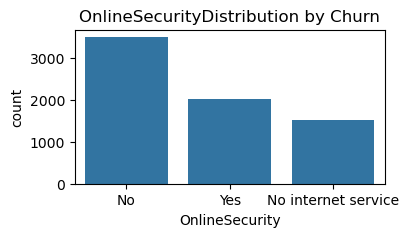

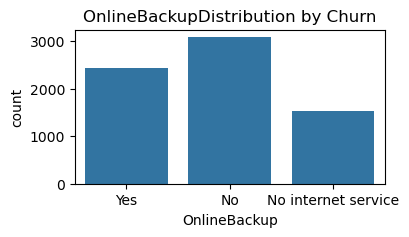

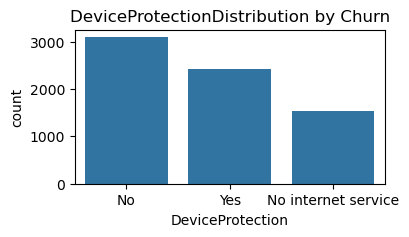

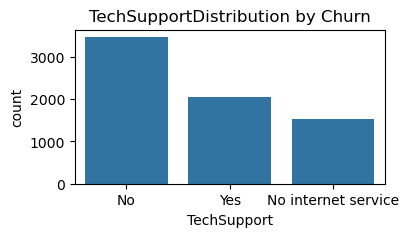

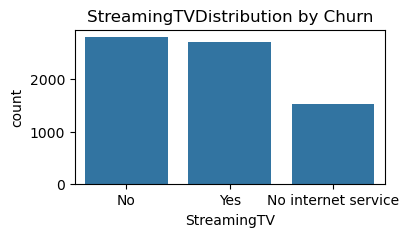

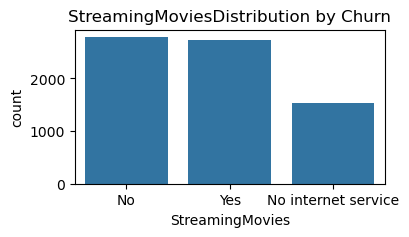

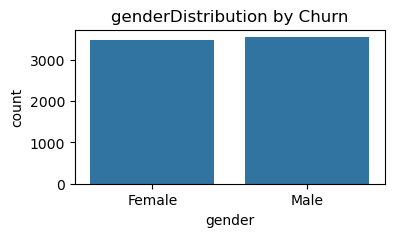

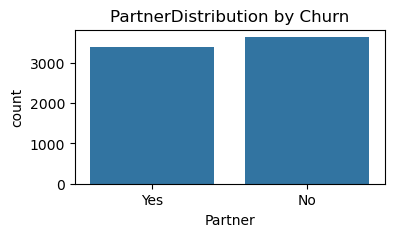

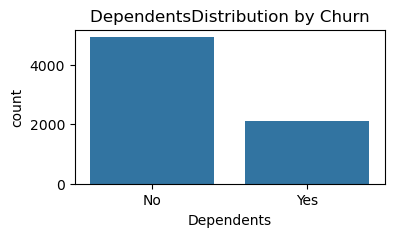

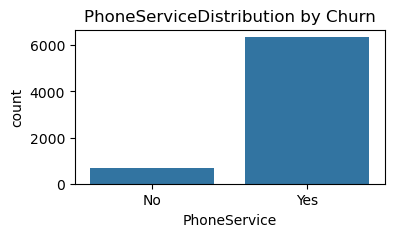

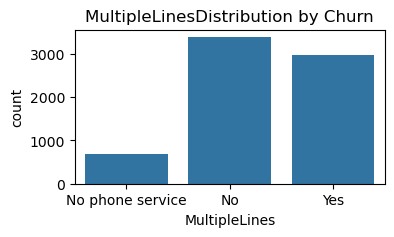

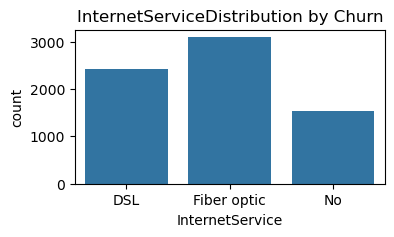

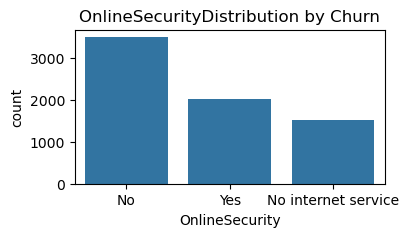

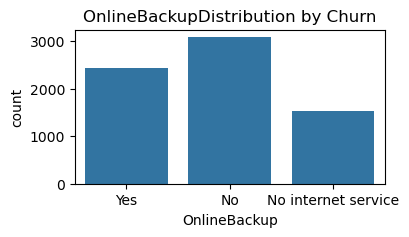

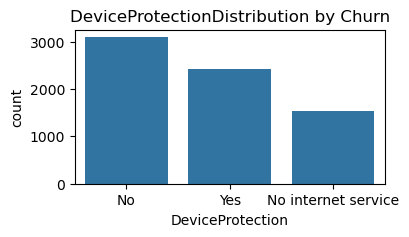

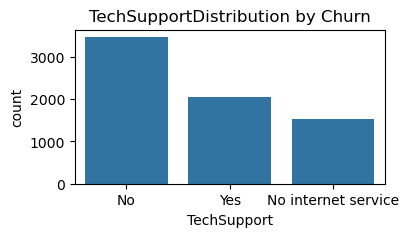

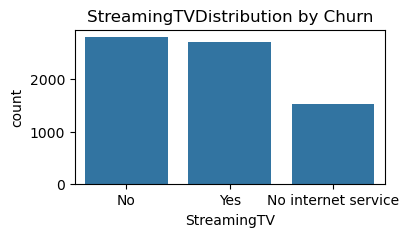

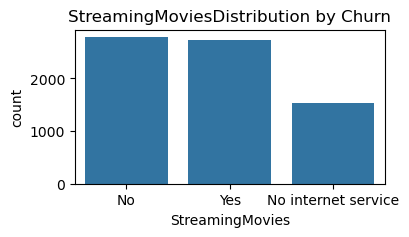

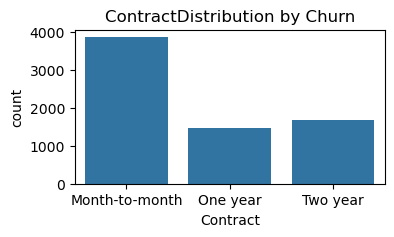

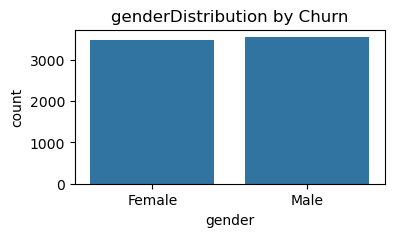

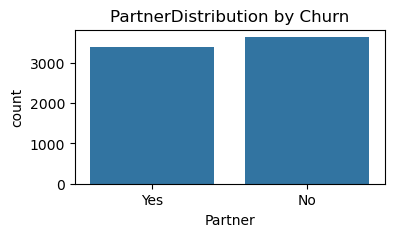

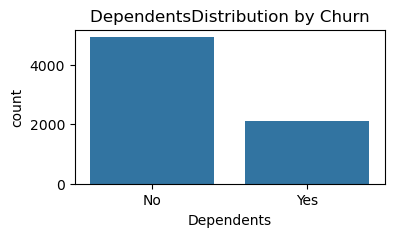

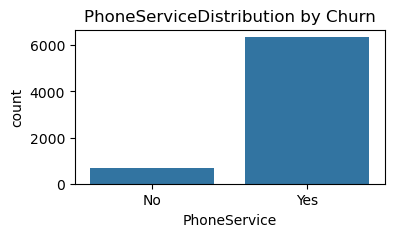

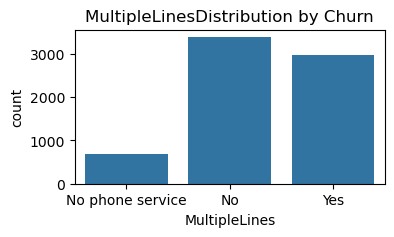

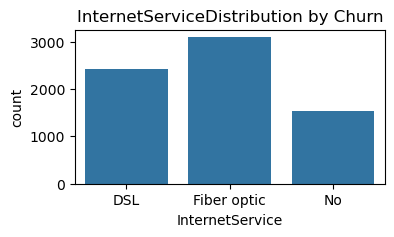

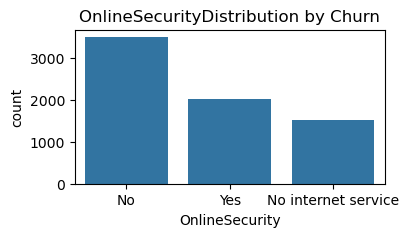

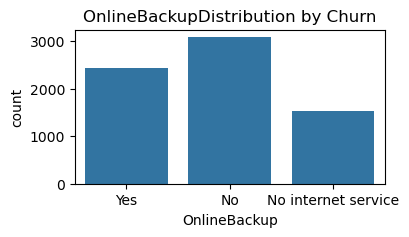

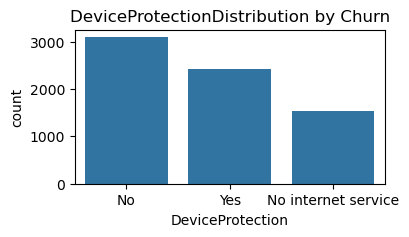

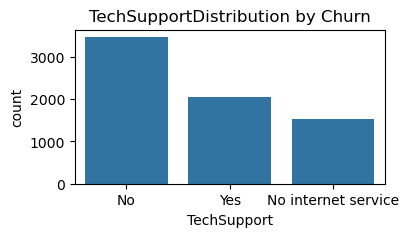

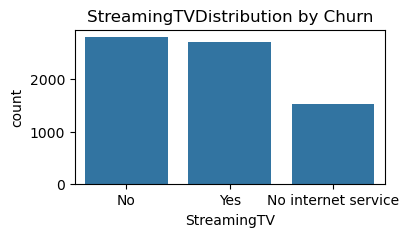

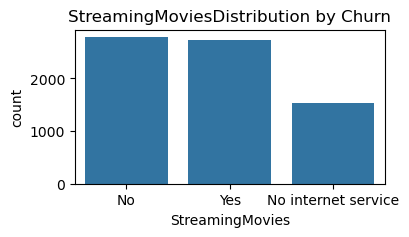

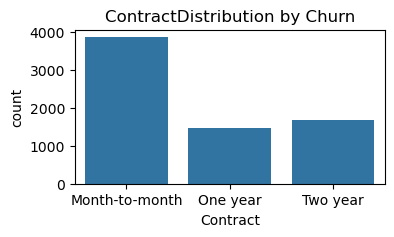

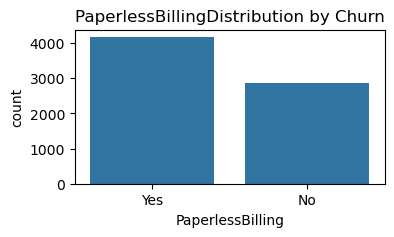

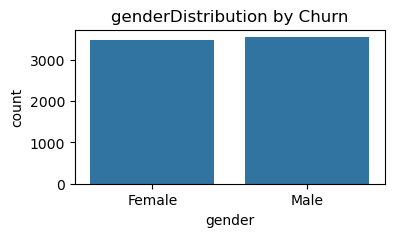

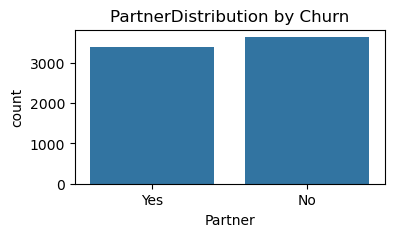

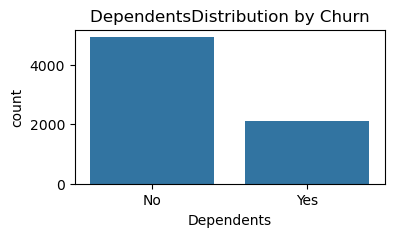

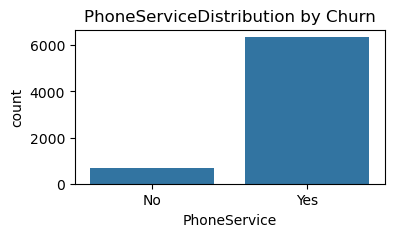

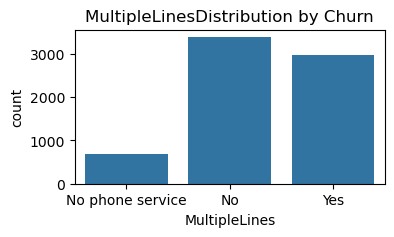

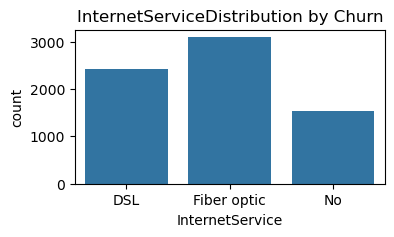

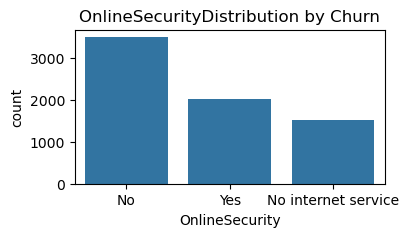

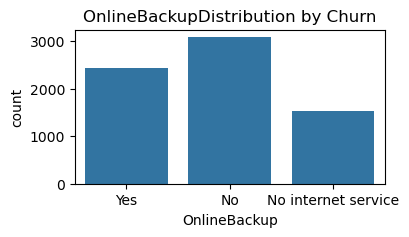

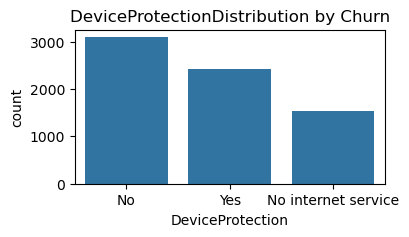

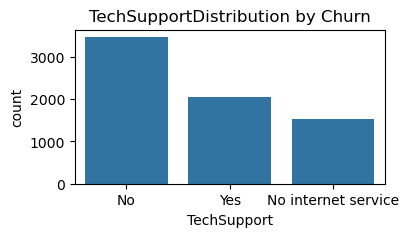

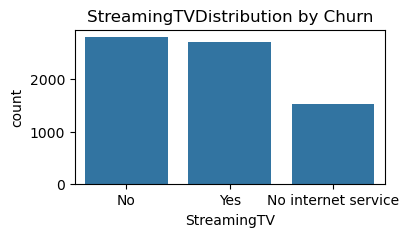

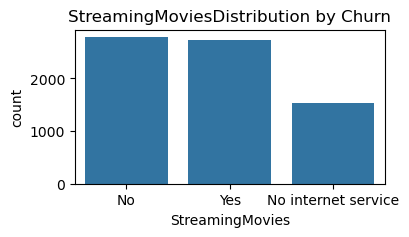

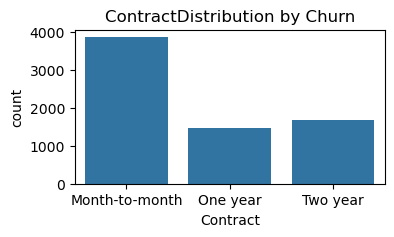

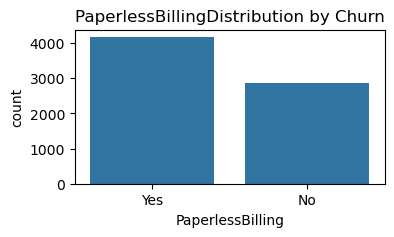

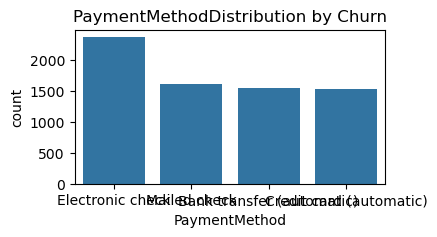

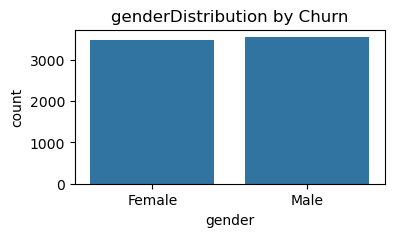

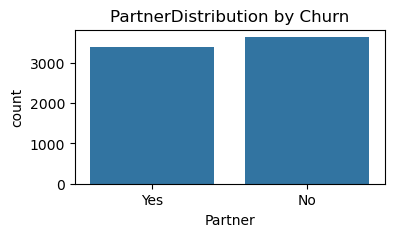

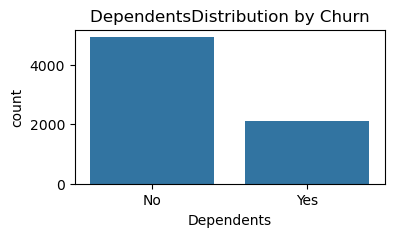

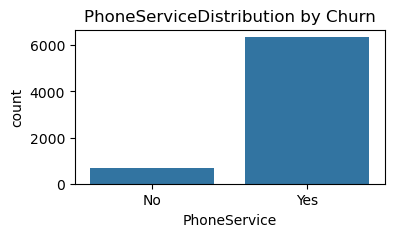

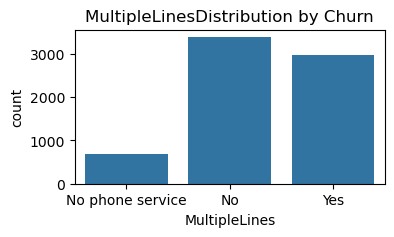

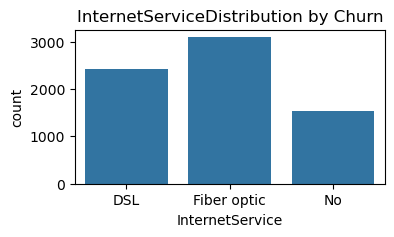

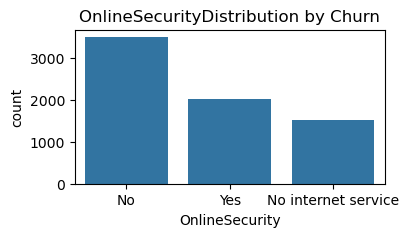

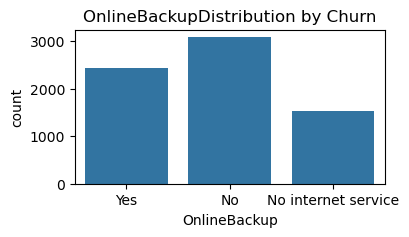

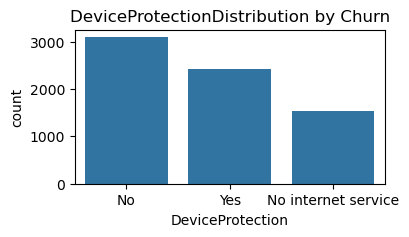

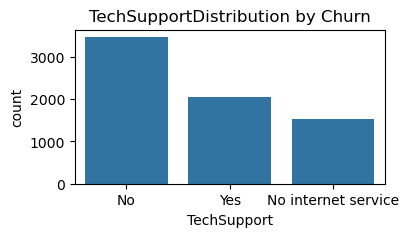

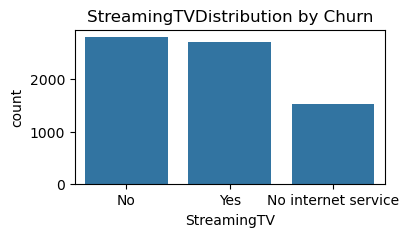

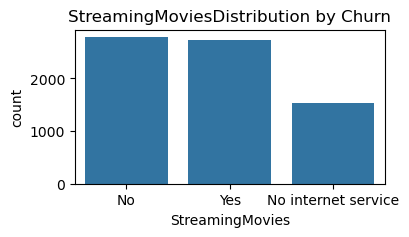

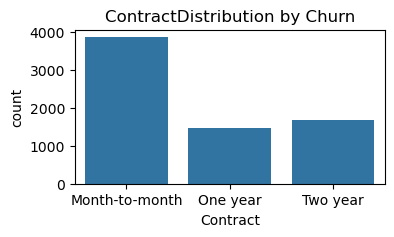

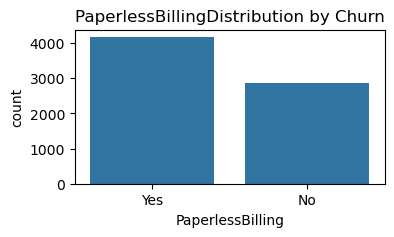

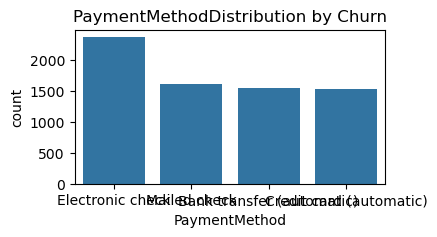

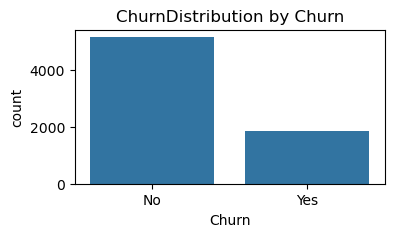

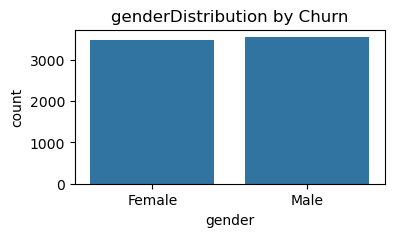

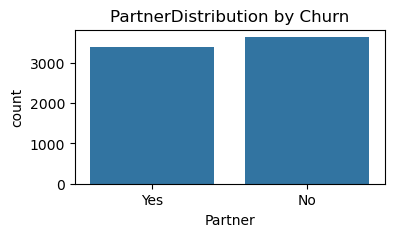

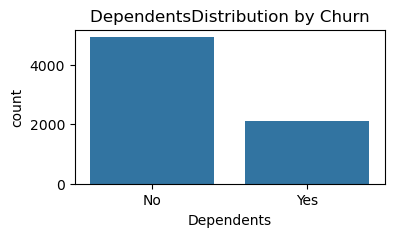

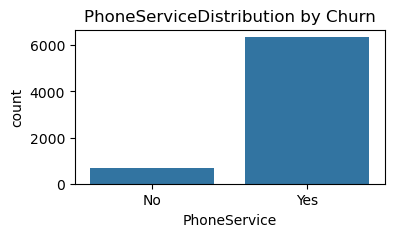

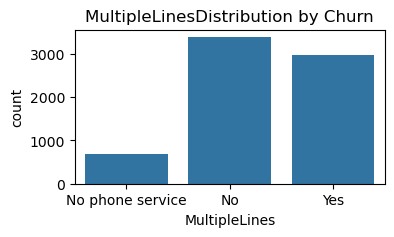

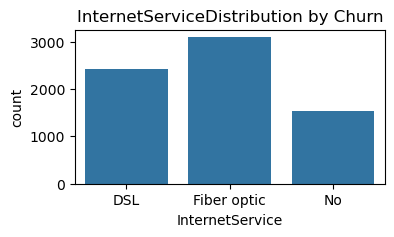

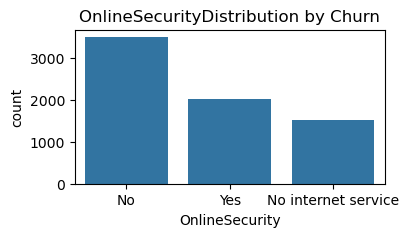

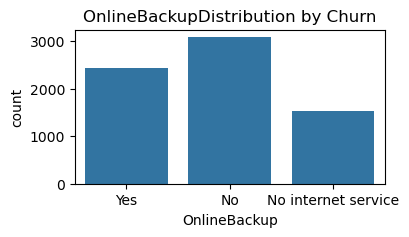

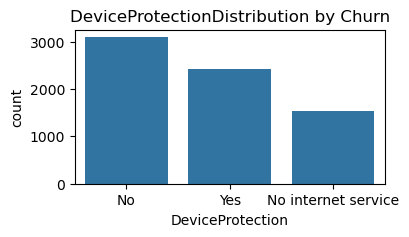

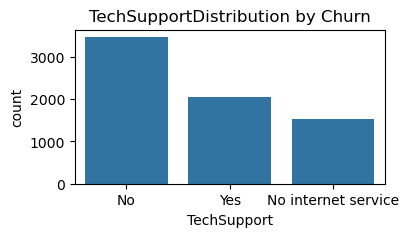

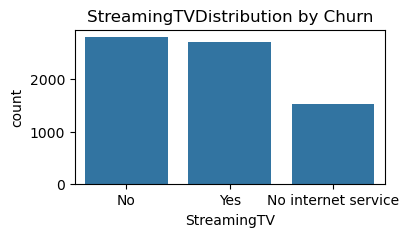

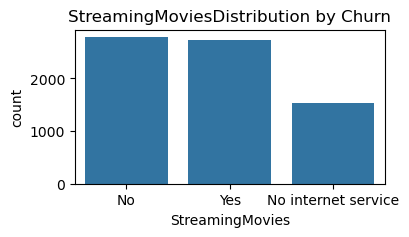

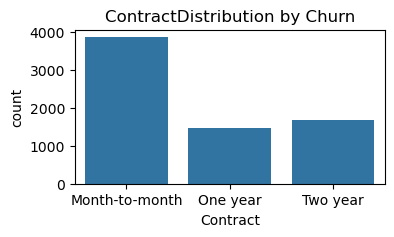

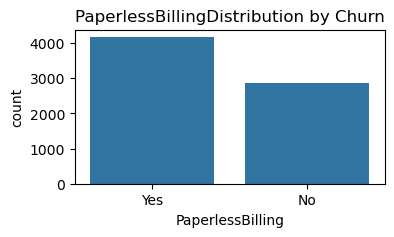

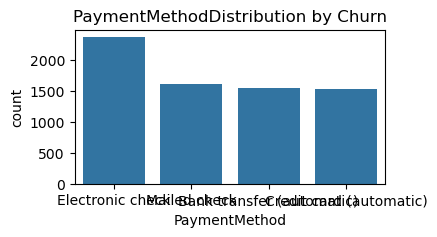

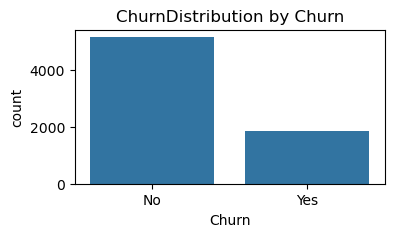

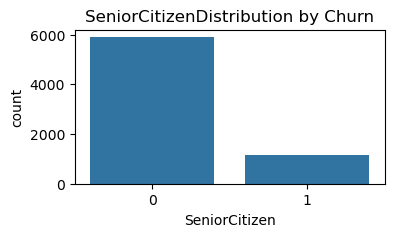

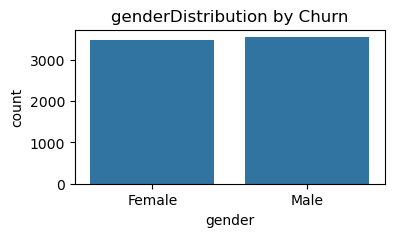

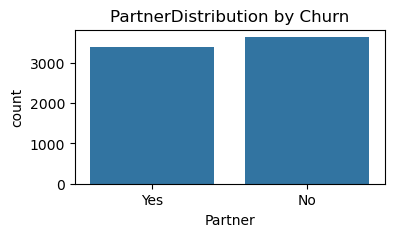

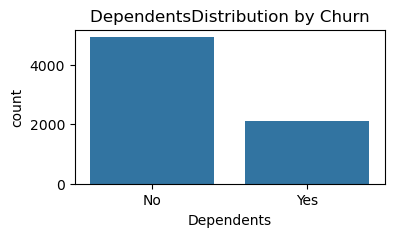

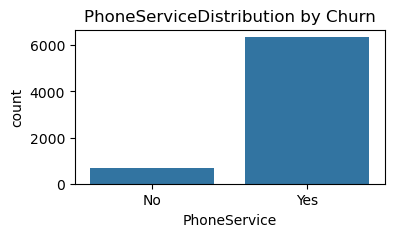

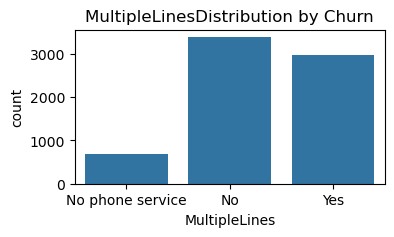

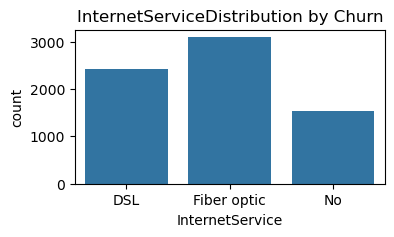

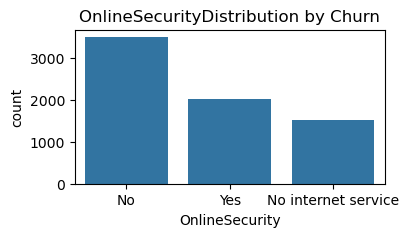

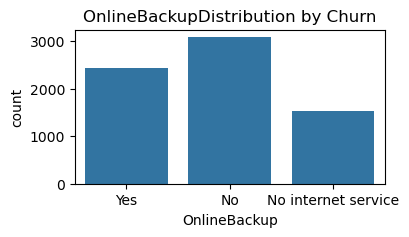

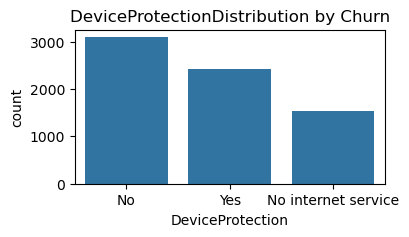

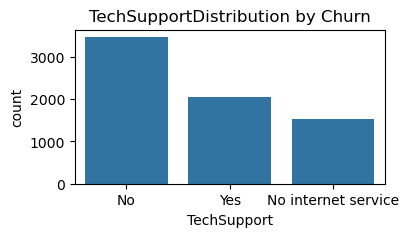

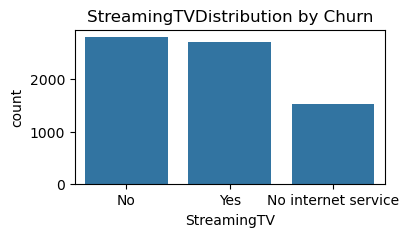

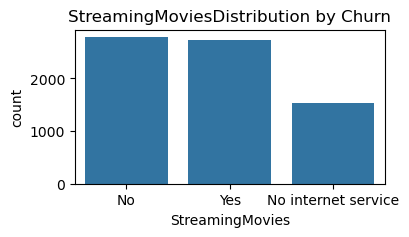

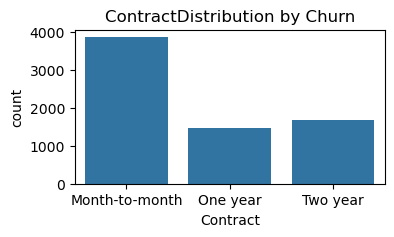

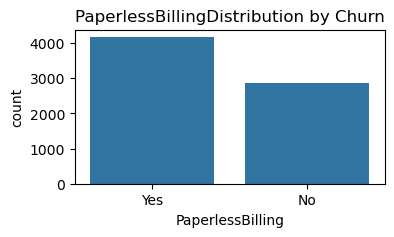

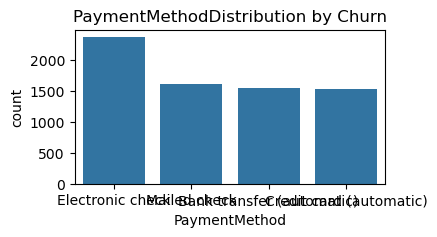

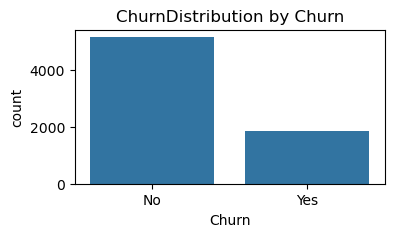

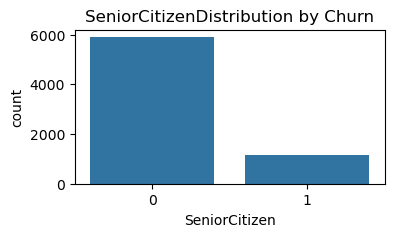

In [51]:

# Categorical columns
categorical_cols = data.select_dtypes(include = "object").columns.to_list() + ['SeniorCitizen']

for col in  categorical_cols:
    plt.figure(figsize = (4,2))
    #sns.countplot(data = data, x = col, hue = 'Churn')
    sns.countplot(x = data[col]) 
    plt.title(f"{col}Distribution by Churn")
    plt.show(0)
    




For a columns like

Dependents: The customer who will not churn is very much more than the customer who will churn

PhoneService: In this column, the customer who are likely to churn is very large as compared to the customer who are not likely to churn.

InternetService: In this column, the
DSL: Non-churn greater than churn.
Fiber optic: 50% non-churn and churn.
No: 90% non-churn, 10% churn.

This helps identify trends, such as higher churn rates for specific categories.

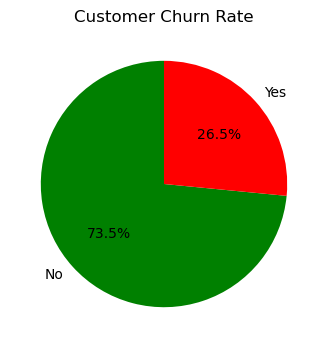

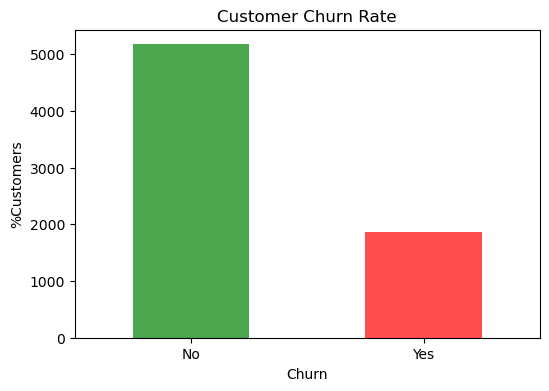

In [52]:
# Get counts for churn categories (Yes = Churned, No = Not Churned)
churn_counts = data['Churn'].value_counts()

# Pie Chart for Churn Rate
plt.figure(figsize=(6, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Customer Churn Rate')
plt.show()

# Bar Plot for Churn Rate
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Customer Churn Rate')
plt.xlabel('Churn')
plt.ylabel('%Customers')
plt.xticks(rotation=0)
plt.show()


In [55]:
#Label Encoding
data['Churn']=data['Churn'].replace({'Yes': 1, 'No': 0})


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [59]:
objects_columns = data.select_dtypes(include = 'object').columns

In [61]:
objects_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [63]:
from sklearn.preprocessing import LabelEncoder

#Labelencoder is used to transform non-numerical labels to numerical labels

encoders = {}

for column in objects_columns:
    label_encoder=LabelEncoder()
    data[column]=label_encoder.fit_transform(data[column])
    encoders[column] = label_encoder

In [65]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [67]:
#Data after using LabelEncoder

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [69]:
#Pickling the file

import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders,f)

Feature Scaling

In [73]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [231]:
data[numerical_cols]

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


In [75]:
data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



In [79]:
#Split the Dataset

X = data.drop(columns = ['Churn'])
y = data['Churn']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

In [85]:
#Applying SMOTE for imbalanced data

smote = SMOTE(random_state = 42)

In [87]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [89]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

After applying SMOTE, the data is equal now no imbalance seen in the Churn (target) column.

**Predictive modeling - ML Algorithms


Logistic Regressi
Random Forest,For
Decin Treeest,

SVMDA, B, an
XG ,Boost
and compare them

1. Random Forest

In [91]:
# Initialize Random Forest Classifier model
model = RandomForestClassifier(random_state = 42)
    

In [93]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.794889992902768

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



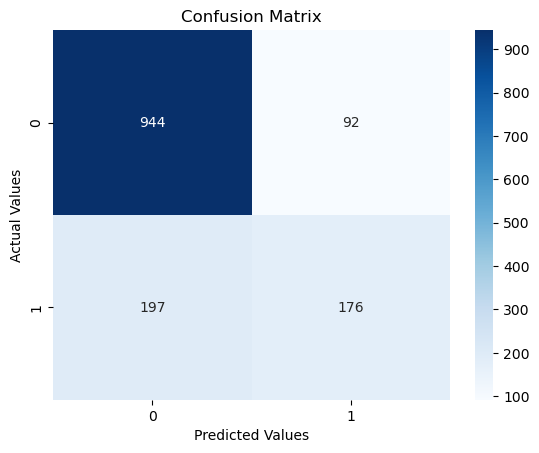

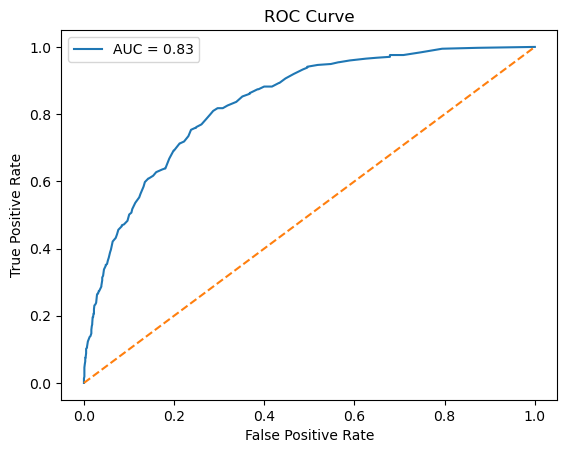

In [95]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [97]:
#Hyperparameter Tuning for Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


In [99]:
#Defined the model
rf = RandomForestClassifier(random_state=42)

# Fit the model with training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [103]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                      # Number of cross-validation folds
    scoring='accuracy',        # Metric to evaluate
    verbose=2,                 # Show progress
    n_jobs=-1                  # Use all processors
)

# Fit the model
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")



Fitting 3 folds for each of 432 candidates, totalling 1296 fits


KeyboardInterrupt: 

In [115]:
from sklearn.model_selection import GridSearchCV

# Get the best model
best_rf = grid_search.best_estimator_  # Or random_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [106]:
#Test data predictions

y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:,1]


In [108]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [110]:
y_test_prob

array([0.72, 0.09, 0.03, ..., 0.  , 0.02, 0.56])

In [112]:
print(f"Accuracy : ", accuracy_score(y_test, y_test_pred))
print(f"ROC-AUC score : ", roc_auc_score(y_test, y_test_pred))
print(f"Confusion Matrix : ", confusion_matrix(y_test, y_test_pred))
print(f"Classification Report : ", classification_report(y_test, y_test_pred))

Accuracy :  0.794889992902768
ROC-AUC score :  0.6915233885743268
Confusion Matrix :  [[944  92]
 [197 176]]
Classification Report :                precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



2. XGBoost

In [114]:
pip install --upgrade xgboost scikit-learn


In [117]:
import xgboost as xgb
import sklearn
print(f"XGBoost version: {xgb.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")


XGBoost version: 2.1.3
scikit-learn version: 1.6.0


In [ ]:
pip install scikit-learn==0.23.2

In [119]:
#Build a model
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [121]:
preds = xgb_cl.predict(X_test)

In [123]:
acc = accuracy_score(y_test, preds)
print ("Model accuracy for Test Data:", acc)

Model accuracy for Test Data: 0.7955997161107168


In [ ]:
pip install --upgrade scikit-learn xgboost

In [125]:
import sklearn
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)

scikit-learn version: 1.6.0
XGBoost version: 2.1.3


In [127]:
#using the xgboost.train method, which fully supports early_stopping_rounds. 
#This approach requires manually creating a DMatrix for training and validation data.

import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Create DMatrix for train and validation sets
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val, label=y_val)

# Define parameters
params = {
    "objective": "binary:logistic",
    "max_depth": 5,
    "learning_rate": 0.1,
    "gamma": 1,
    "scale_pos_weight": 2,
    "subsample": 1,
    "colsample_bytree": 1,
    "eval_metric": "auc"
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "eval")]
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10
)

# Evaluate
preds = model.predict(dval)
print("Validation AUC:", roc_auc_score(y_val, preds))


NameError: name 'X_train_split' is not defined

3. Logistic Regresson

Accuracy: 0.8168914123491838

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



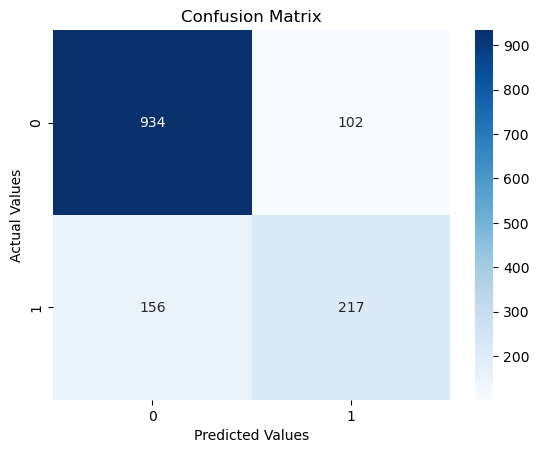

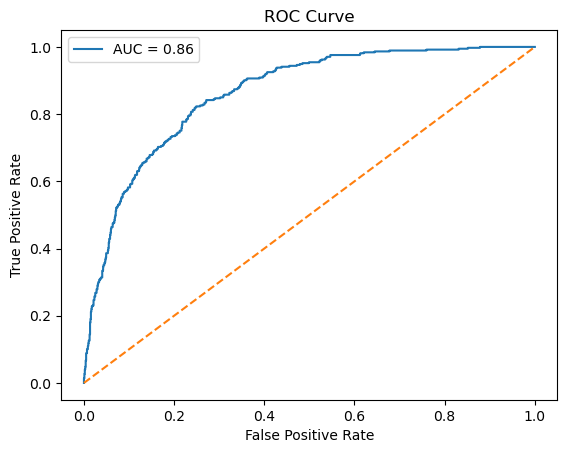

In [129]:
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [131]:
#Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV

# Logistic Regression Model
log_reg = LogisticRegression()

#Hyperparameter Grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],               # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],   # Solvers
    'max_iter': [100, 200, 500],                # Maximum number of iterations
}

# GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



Fitting 5 folds for each of 180 candidates, totalling 900 fits


KeyboardInterrupt: 

3. Decision Tree Classifier

Accuracy: 0.794180269694819

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.61      0.64      0.62       373

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.80      1409



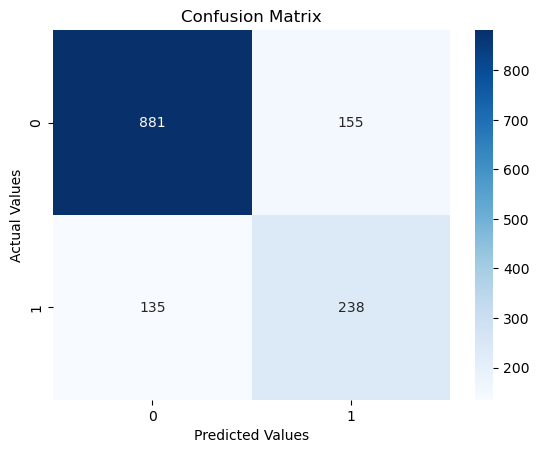

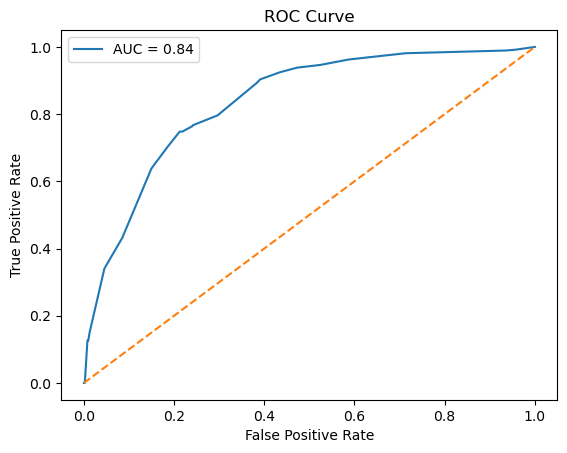

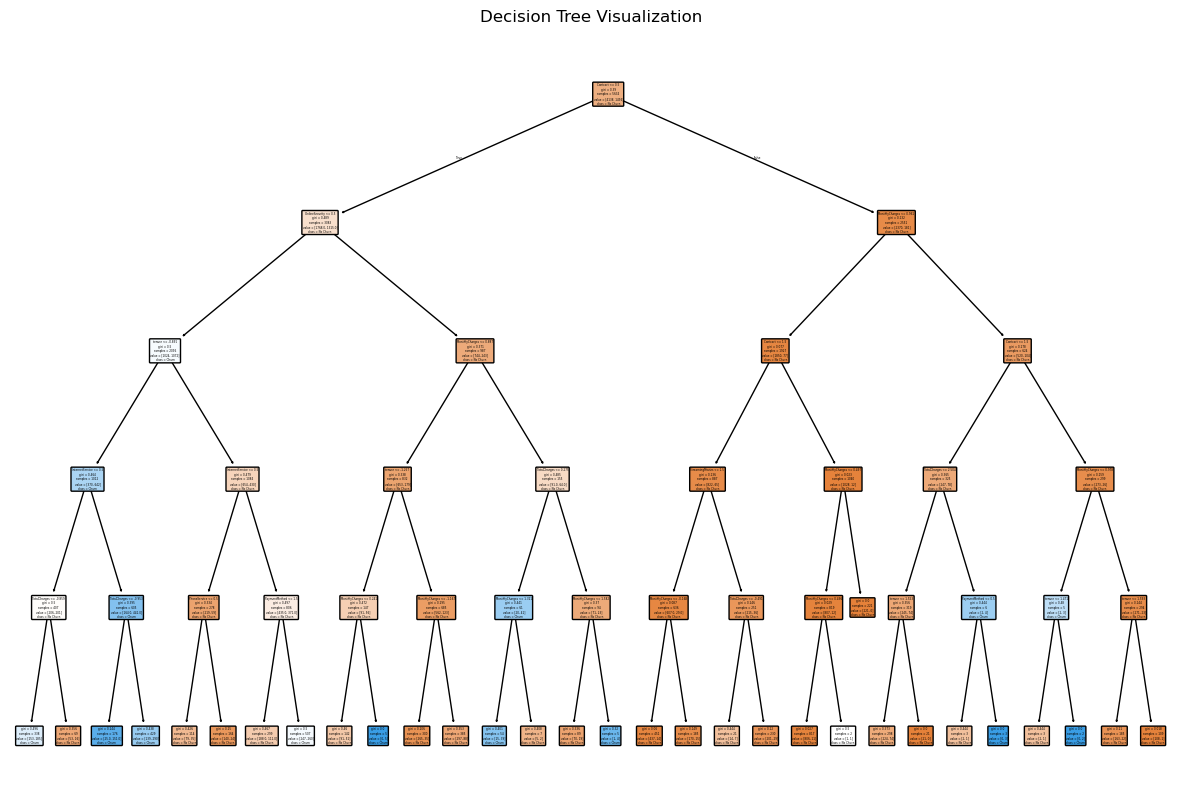

In [133]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

#Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [137]:
# Predict on test data
test_predictions = dt_model.predict(X_test)

# Output the test predictions
test_predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_predictions
})
print(test_predictions_df.head())

print("Accuracy on Test Data:", accuracy_score(y_test, test_predictions))
print("\nClassification Report:\n", classification_report(y_test, test_predictions))


      Actual  Predicted
185        1          1
2715       0          0
3825       0          0
1807       1          1
132        0          0
Accuracy on Test Data: 0.794180269694819

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.61      0.64      0.62       373

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.80      1409



4. Support Vector Machine

Accuracy: 0.8112136266855926

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



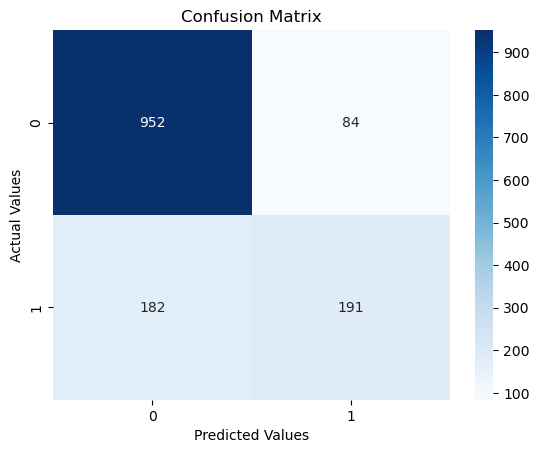

KeyboardInterrupt: 

In [139]:
from sklearn.svm import SVC

# Initialize SVM Classifier (RBF kernel for non-linear decision boundaries)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [141]:
# Predict on test data
test_predictions = svm_model.predict(X_test)

# Output the test predictions
test_predictions_df = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': test_predictions
})
print(test_predictions_df.head())


# Evaluate the predictions
print("Accuracy on Test Data:", accuracy_score(y_test, test_predictions))
print("\nClassification Report:\n", classification_report(y_test, test_predictions))

   Actual  Predicted
0       1          1
1       0          0
2       0          0
3       1          1
4       0          0
Accuracy on Test Data: 0.8112136266855926

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



5. AdaBoost Classifier

In [ ]:
import sklearn
print(sklearn.__version__)

In [143]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize AdaBoost Classifier with a base Decision Tree
base_model = DecisionTreeClassifier(max_depth=2)  # Base model for AdaBoost
ada_model = AdaBoostClassifier(estimator=base_model, n_estimators=100, random_state=42)


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier with a base Decision Tree
base_estimator = DecisionTreeClassifier(max_depth=2)  # Base model for AdaBoost
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)
y_prob = ada_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                           index=['No Churn', 'Churn'], columns=['Predicted No Churn', 'Predicted Churn'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Save predictions to CSV
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_prob})
predictions_df.to_csv('adaboost_churn_predictions.csv', index=False)
print("Predictions saved to 'adaboost_churn_predictions.csv'.")


In [ ]:
pip install streamlit

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Initialize the KNN classifier with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Optimize k by testing different values
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()

In [ ]:
#Hyperparameter tuning for KNN using GridsearchCV


# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': range(1, 31),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function for distance
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
#Hyperparameter tuning using RandomizedSearchCV 
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for KNN
param_dist = {
    'n_neighbors': randint(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Perform random search on the training data
random_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))

In [226]:
# Feature importance (optional, for explainability)
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print("\nFeature Importances:\n", importance_df.sort_values(by='Importance', ascending=False))


Feature Importances:
              Feature  Importance
14          Contract    0.634254
7    InternetService    0.109041
8     OnlineSecurity    0.049251
11       TechSupport    0.022347
5       PhoneService    0.021452
17    MonthlyCharges    0.015172
16     PaymentMethod    0.014650
4             tenure    0.014281
3         Dependents    0.014196
13   StreamingMovies    0.012986
12       StreamingTV    0.012185
18      TotalCharges    0.011812
0             gender    0.011621
9       OnlineBackup    0.011400
6      MultipleLines    0.011072
2            Partner    0.009299
15  PaperlessBilling    0.008684
10  DeviceProtection    0.008291
1      SeniorCitizen    0.008005


Results of all the above model's accuracy

In [242]:
# Scale the features for KNN and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# Train and evaluate each classifier
results = {}

for name, clf in classifiers.items():
    if name in ['Logistic Regression', 'K-Nearest Neighbors']:  # Use scaled data for these models
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

# Display results
print("\nModel Accuracies:")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")


Logistic Regression Accuracy: 0.82
K-Nearest Neighbors Accuracy: 0.76
Random Forest Accuracy: 0.79
AdaBoost Accuracy: 0.81
XGBoost Accuracy: 0.80

Model Accuracies:
Logistic Regression: 0.82
K-Nearest Neighbors: 0.76
Random Forest: 0.79
AdaBoost: 0.81
XGBoost: 0.80


**Model training using all features**

1.Decision Tree Classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# Assuming X and y are already defined
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X, y)

# Split the dataset into training and testing sets
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier correctly
clf = DecisionTreeClassifier(min_samples_leaf=5)  # Example value for min_samples_leaf
clf.fit(xr_train, yr_train)

# Predict or evaluate
y_pred = clf.predict(xr_test)


In [155]:
model_data_smote =  DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=6, min_samples_leaf=8)

In [159]:
model_data_smote.fit(xr_train, yr_train)
yr_predict = model_data_smote.predict(xr_test)

In [163]:
print(classification_report(yr_test, yr_predict, labels = [0,1])) #used 'yr_predict' instead of 'y_pred_smote'

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       581
           1       0.90      0.95      0.92       701

    accuracy                           0.91      1282
   macro avg       0.92      0.91      0.91      1282
weighted avg       0.92      0.91      0.91      1282



In [165]:
# Scale the features to standardize the data
scaler = StandardScaler()
xr_train = scaler.fit_transform(xr_train)
yr_test = scaler.transform(xr_test)


2. Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

# Assuming X and y are defined
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X, y)

# Split the dataset
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled1, y_resampled1, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rfc_smote = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    random_state=42,
    max_depth=6,
    min_samples_leaf=8
)
rfc_smote.fit(xr_train, yr_train)

# Make predictions
yr_predict = rfc_smote.predict(xr_test)

# Evaluate the model
print(classification_report(yr_test, yr_predict, labels=[0, 1]))



              precision    recall  f1-score   support

           0       0.94      0.89      0.91       574
           1       0.91      0.95      0.93       715

    accuracy                           0.92      1289
   macro avg       0.92      0.92      0.92      1289
weighted avg       0.92      0.92      0.92      1289



In [181]:
#Hyperparameter tuning for Random forest
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],                # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],                 # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                           # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],                  # Number of features to consider at each split
    'bootstrap': [True, False]                               # Whether bootstrap samples are used
}

# Initialize the Random Forest classifier
rfc_smote = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search on training data
grid_search.fit(xr_train, yr_train)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rfc_smote = grid_search.best_estimator_
yr_pred = best_rf.predict(xr_test)

# Model Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(yr_test, yr_pred))
print("\nClassification Report:\n", classification_report(yr_test, yr_pred))
print("Test Set Accuracy:", accuracy_score(yr_test, yr_pred))


Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


KeyboardInterrupt: 

3.Logistic Regression

Accuracy: 0.9076803723816912

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       574
           1       0.92      0.92      0.92       715

    accuracy                           0.91      1289
   macro avg       0.91      0.91      0.91      1289
weighted avg       0.91      0.91      0.91      1289



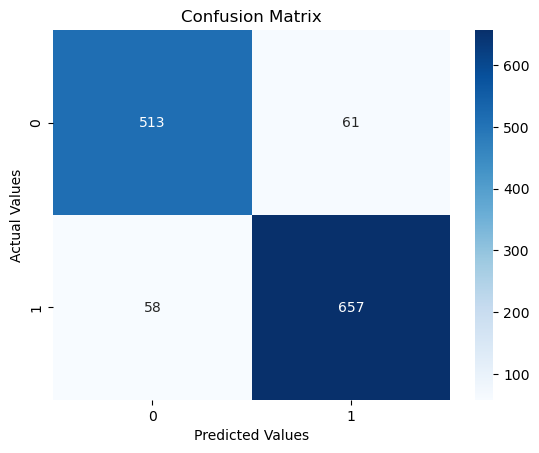

In [183]:
# Initialize logistic regression model
lrc = LogisticRegression(max_iter=1000)

# Train the model
lrc.fit(xr_train, yr_train)

# Make predictions
yr_predict = lrc.predict(xr_test)

# Evaluate the model
print("Accuracy:", accuracy_score(yr_test, yr_predict))
print("\nClassification Report:\n", classification_report(yr_test, yr_predict))

# Confusion Matrix
conf_matrix = confusion_matrix(yr_test, yr_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()



Logistic Regression ROC AUC score: 0.97


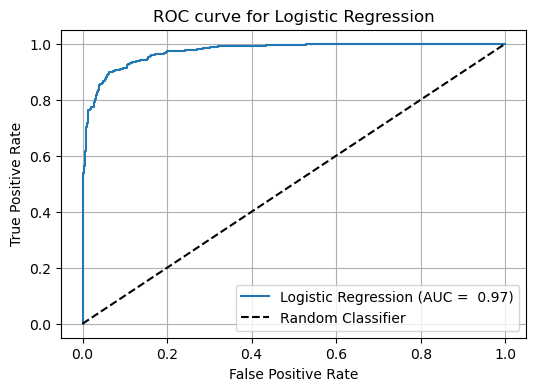

In [197]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

yr_predict_proba2 = lrc.predict_proba(xr_test)[:,1]  #Extract  probabilities for positive class (class 1)

#Compute ROC-AUC scoreabs

roc_auc = roc_auc_score(yr_test, yr_predict_proba2)
print(f"Logistic Regression ROC AUC score: {roc_auc:.2f}")

#Generate data for the ROC curve
fpr, tpr, thresholds = roc_curve(yr_test, yr_predict_proba2)

#Plot the ROC curve
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, label = f"Logistic Regression (AUC = {roc_auc: .2f})")
plt.plot([0,1],[0,1], "k--", label = "Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Logistic Regression")
plt.legend(loc = "best")
plt.grid()
plt.show()


4. XGBoost

In [202]:
from xgboost import XGBClassifier

#Initialize XGB model
model = XGBClassifier()
model.fit(xr_train, yr_train)

#Make predictions
preds100 = model.predict(xr_test)
metrics.accuracy_score, preds100


(<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 array([1, 0, 1, ..., 1, 0, 1]))

In [207]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       574
           1       0.97      0.95      0.96       715

    accuracy                           0.96      1289
   macro avg       0.95      0.96      0.96      1289
weighted avg       0.96      0.96      0.96      1289

Confusion Matrix:
[[550  24]
 [ 33 682]]
ROC AUC Score: 0.99


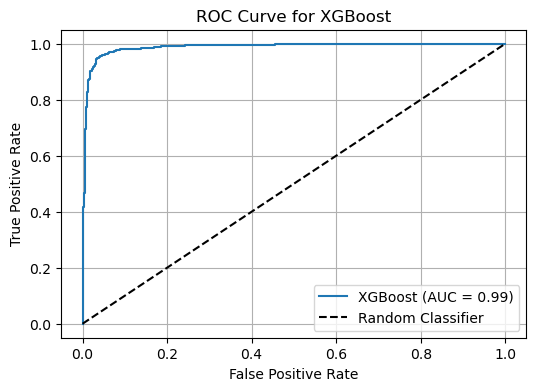

In [209]:
# Accuracy Score
accuracy = accuracy_score(yr_test, preds100)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(yr_test, preds100))

# Confusion Matrix
cm = confusion_matrix(yr_test, preds100)
print("Confusion Matrix:")
print(cm)

# Optional: ROC-AUC (only for binary classification)
if len(set(yr_test)) == 2:  # Ensure it's binary classification
    preds_proba = model.predict_proba(xr_test)[:, 1]  # Get probabilities for the positive class
    roc_auc = roc_auc_score(yr_test, preds_proba)
    print(f"ROC AUC Score: {roc_auc:.2f}")

    # Plot the ROC Curve
    fpr, tpr, thresholds = roc_curve(yr_test, preds_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve for XGBoost")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


5. Adaboost

Accuracy: 0.9006982156710628
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       574
           1       0.90      0.92      0.91       715

    accuracy                           0.90      1289
   macro avg       0.90      0.90      0.90      1289
weighted avg       0.90      0.90      0.90      1289

ROC AUC Score: 0.97


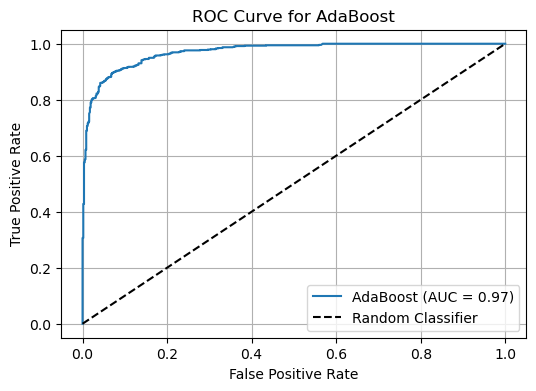

In [214]:
# Initialize AdaBoost model with a Decision Tree as the weak learner
weak_learner = DecisionTreeClassifier(max_depth=1)  # Weak learner
adaboost = AdaBoostClassifier(estimator=weak_learner, n_estimators=100, random_state=42)

# Train the model
adaboost.fit(xr_train, yr_train)

# Make predictions
yr_predict = adaboost.predict(xr_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(yr_test, yr_predict))
print("Classification Report:")
print(classification_report(yr_test, yr_predict))

# Compute and plot the ROC Curve (if binary classification)
if len(set(yr_test)) == 2:  # Ensure binary classification
    yr_predict_proba = adaboost.predict_proba(xr_test)[:, 1]
    roc_auc = roc_auc_score(yr_test, yr_predict_proba)
    print(f"ROC AUC Score: {roc_auc:.2f}")

    fpr, tpr, thresholds = roc_curve(yr_test, yr_predict_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve for AdaBoost")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

6. KNN Classifier

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [219]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Default: Euclidean distance
knn.fit(xr_train, yr_train)

# Make predictions
yr_predict = knn.predict(xr_test)

# Evaluate the model
print("Accuracy:", accuracy_score(yr_test, yr_predict))
print("Classification Report:")
print(classification_report(yr_test, yr_predict))

# Confusion Matrix
cm = confusion_matrix(yr_test, yr_predict)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9526764934057409
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       574
           1       0.93      0.98      0.96       715

    accuracy                           0.95      1289
   macro avg       0.96      0.95      0.95      1289
weighted avg       0.95      0.95      0.95      1289

Confusion Matrix:
[[525  49]
 [ 12 703]]


ROC AUC Score: 0.99


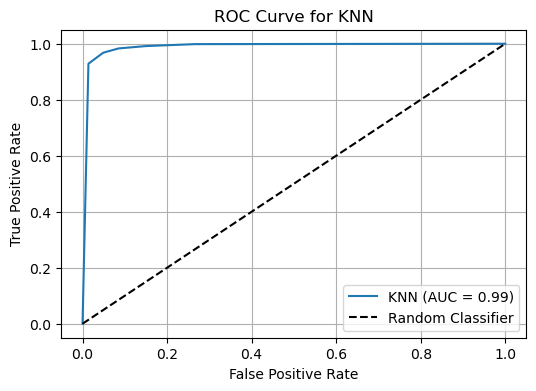

In [221]:
#Compute and plot the ROC Curve 
if len(set(yr_test)) == 2:  # To ensure binary classification
    yr_predict_proba = knn.predict_proba(xr_test)[:, 1]  # Probability for the positive class
    roc_auc = roc_auc_score(yr_test, yr_predict_proba)
    print(f"ROC AUC Score: {roc_auc:.2f}")

    fpr, tpr, thresholds = roc_curve(yr_test, yr_predict_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve for KNN")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

Results of all the models of resampled data with all the features

In [224]:
# Define a list of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(xr_train, yr_train)
    predictions = clf.predict(xr_test)
    accuracy = accuracy_score(yr_test, predictions)
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.2f}")

# Print a summary of results
print("\nSummary of Classifier Accuracies:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2f}")

Logistic Regression: Accuracy = 0.91
K-Nearest Neighbors: Accuracy = 0.95
Decision Tree: Accuracy = 0.92
Random Forest: Accuracy = 0.95
AdaBoost: Accuracy = 0.90
XGBoost: Accuracy = 0.96

Summary of Classifier Accuracies:
Logistic Regression: 0.91
K-Nearest Neighbors: 0.95
Decision Tree: 0.92
Random Forest: 0.95
AdaBoost: 0.90
XGBoost: 0.96


In [246]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [256]:
#Installed streamlit
#After installing save model

import joblib  # To load saved models



In [258]:
!pip install streamlit joblib scikit-learn xgboost

In [3]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Train the models on your data (ensure X_train and y_train are defined)
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Save all the models
joblib.dump(logistic_regression_model, 'logistic_regression_model.pkl')
joblib.dump(knn_model, 'knn_model.pkl')
joblib.dump(decision_tree_model, 'decision_tree_model.pkl')
joblib.dump(random_forest_model, 'random_forest_model.pkl')
joblib.dump(adaboost_model, 'adaboost_model.pkl')
joblib.dump(xgb_model, 'xgb_model.pkl')

# Save the scaler (if applicable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
joblib.dump(scaler, 'scaler.pkl')



NameError: name 'X_train' is not defined

In [ ]:
#Deploy Customer Churn Prediction using Streamlit

In [1]:
# Save the trained model to a file
dump(model, 'xgboost_model.joblib')


NameError: name 'dump' is not defined